## Optimization 

Here we consider simple quadratic cost functions, examine their derivatives, and use gradient descent to find their minima.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Quadratic cost function, one dimension

Consider a toy-example a cost function $L(w)$ in one dimension:

$L(w) = w^2$

When we optimize a model, we want to find the parameter $w$ that minimizes cost. In this case, the optimal value of the parameter is obviously $w=0$, but let's pretend we don't know that because, in general, we won't.

To find the mimimum of this function, we start at some value of $w$ and then follow the derivative of the function for a small step-size $\Delta$. The derivative in this case is:

$\frac{dL(w)}{dw} = 2w$

This gives us the equation of the line that is tangent to the cost function at each point. We'll use "quiver" to draw segments (pink) of the tangent line at various points on $L(w)$. The length of the line segment is governed by $\Delta$. The slope indicates the direction to travel along the $w$ axis: at each point $w$, we move along the $w$-axis for $w*2w*\Delta$ units.

(-5, 100)

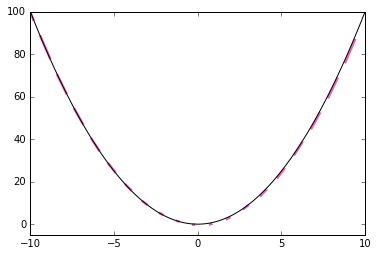

In [38]:
##define step size and range of function evaluation
delta = 0.91
w = np.linspace(-10,10,num=100)

##plot the cost function L(w)
plt.plot(w, w**2, 'k')

##plot a vector along the line defined by the derivative of L(w) for some values of w.
d_color = np.array([.9,.4,.7])
for ii in w[0:-1:5]:
    plt.quiver(ii,ii**2,delta,2*ii*delta,angles='xy', scale_units ='xy',scale=1,pivot='middle',headwidth=0,color=d_color)
    
plt.ylim([-5,100])


Now we'll try to reach the bottom of the cost function starting at some initial value $w_0$ and then travelling small distances in the direction of the derivative at each step. This is called "gradient descent". We'll see how important step size for determining how quickly you reach the bottom.

(0, 110)

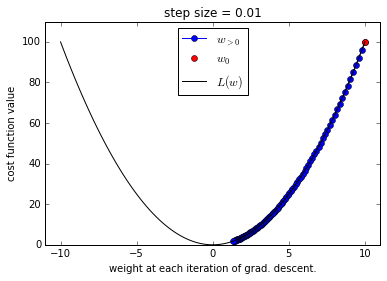

In [27]:
w_0 = 10
num_steps = 100

##let's try a small step-size first
delta = .01
cost = np.zeros(num_steps)
weight_trajectory = np.zeros(num_steps)

weight_trajectory[0] = w_0
cost[0] = w_0**2
##this is an example of a gradient descent training loop
for ii in range(1, num_steps):
    w_new = w_0-2*w_0*delta  ##<<<<-----------HERE IS WHERE WE TAKE THE GRADIENT STEP!
    w_0 = np.copy(w_new)
    cost[ii] = w_new**2
    weight_trajectory[ii] = w_new

##plot cost as a function of weight trajectory
plt.title('step size = %0.2f' %(delta))
plt.ylabel('cost function value')
plt.xlabel('weight at each iteration of grad. descent.')
plt.plot(weight_trajectory,cost, '-o', label = '$w_{>0}$')
plt.plot(weight_trajectory[0],cost[0], 'ro', label='$w_0$')
plt.plot(w, w**2, 'k', label='$L(w)$')
plt.legend(numpoints=1, loc = 'best')
plt.xlim([-11,11])
plt.ylim([0,110])

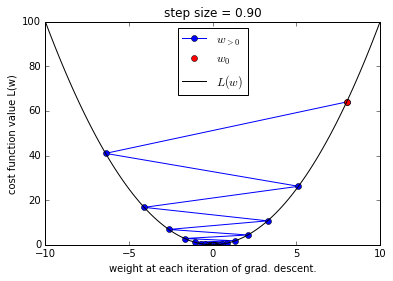

In [29]:
##now a larger delta
w_0 = -10
delta = .9
cost = np.zeros(num_steps)
weight_trajectory = np.zeros(num_steps)
for ii in range(num_steps):
    w_new = w_0-2*w_0*delta
    w_0 = np.copy(w_new)
    cost[ii] = w_new**2
    weight_trajectory[ii] = w_new

##plot cost as a function of weight trajectory
plt.title('step size = %0.2f' %(delta))
plt.ylabel('cost function value L(w)')
plt.xlabel('weight at each iteration of grad. descent.')
plt.plot(weight_trajectory,cost, '-o', label = '$w_{>0}$')
plt.plot(weight_trajectory[0],cost[0], 'ro', label='$w_0$')
plt.plot(w, w**2, 'k', label='$L(w)$')
plt.legend(numpoints=1, loc = 'best')

(0, 110)

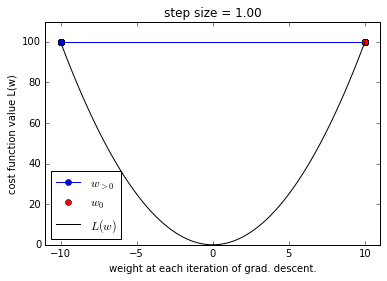

In [30]:
##this is pathological
w_0 = -10
delta = 1.0
cost = np.zeros(num_steps)
weight_trajectory = np.zeros(num_steps)
for ii in range(num_steps):
    w_new = w_0-2*w_0*delta
    w_0 = np.copy(w_new)
    cost[ii] = w_new**2
    weight_trajectory[ii] = w_new

##plot cost as a function of weight trajectory
plt.title('step size = %0.2f' %(delta))
plt.ylabel('cost function value L(w)')
plt.xlabel('weight at each iteration of grad. descent.')
plt.plot(weight_trajectory,cost, '-o', label = '$w_{>0}$')
plt.plot(weight_trajectory[0],cost[0], 'ro', label='$w_0$')
plt.plot(w, w**2, 'k', label='$L(w)$')
plt.legend(numpoints=1, loc = 'best')
plt.xlim([-11,11])
plt.ylim([0,110])

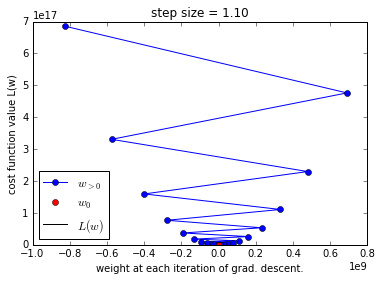

In [31]:
##if delta is too big, you will see overflow errors
w_0 = -10
delta = 1.1
cost = np.zeros(num_steps)
weight_trajectory = np.zeros(num_steps)
for ii in range(num_steps):
    w_new = w_0-2*w_0*delta
    w_0 = np.copy(w_new)
    cost[ii] = w_new**2
    weight_trajectory[ii] = w_new

##plot cost as a function of weight trajectory
plt.title('step size = %0.2f' %(delta))
plt.ylabel('cost function value L(w)')
plt.xlabel('weight at each iteration of grad. descent.')
plt.plot(weight_trajectory,cost, '-o', label = '$w_{>0}$')
plt.plot(weight_trajectory[0],cost[0], 'ro', label='$w_0$')
plt.plot(w, w**2, 'k', label='$L(w)$')
plt.legend(numpoints=1, loc = 'best')


#### Exercise
Generalize the above code to two dimensions, where cost function is defined:

$L(\mathbf{w}) = \mathbf{w} \cdot \mathbf{w} $

What is the derivative ? 
Draw the cost function trajectory, as above. Find a good step-size for this cost function.

In [ ]:
### your code here